In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import ResNet50 library and add preprocessing layer to the front.

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

resnet.summary()


n[0][0]          
__________________________________________________________________________________________________
conv3_block4_out (Activation)   (None, 28, 28, 512)  0           conv3_block4_add[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_conv (Conv2D)    (None, 14, 14, 256)  131328      conv3_block4_out[0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0] 

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [6]:
folders

['Datasets/Train/audi',
 'Datasets/Train/mahindra',
 'Datasets/Train/tata',
 'Datasets/Train/hyundai',
 'Datasets/Train/mercedes',
 'Datasets/Train/lamborghini']

In [7]:
# Added Layers
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view structure of the model
model.summary()


0][0]           
__________________________________________________________________________________________________
conv4_block1_1_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_1_relu (Activation (None, 14, 14, 256)  0           conv4_block1_1_bn[0][0]          
__________________________________________________________________________________________________
conv4_block1_2_conv (Conv2D)    (None, 14, 14, 256)  590080      conv4_block1_1_relu[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_bn (BatchNormali (None, 14, 14, 256)  1024        conv4_block1_2_conv[0][0]        
__________________________________________________________________________________________________
conv4_block1_2_relu (Activation (None, 14, 14, 256)  0           conv4_block1_2_bn[0][0]    

In [10]:
# specify cost and optimization methods
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 164 images belonging to 6 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 122 images belonging to 6 classes.


In [15]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
6/6 [==============================] - 34s 6s/step - loss: 11.1572 - accuracy: 0.1707 - val_loss: 9.6133 - val_accuracy: 0.1475
Epoch 2/50
6/6 [==============================] - 47s 8s/step - loss: 5.5160 - accuracy: 0.2317 - val_loss: 4.2238 - val_accuracy: 0.2459
Epoch 3/50
6/6 [==============================] - 33s 6s/step - loss: 3.9800 - accuracy: 0.2683 - val_loss: 4.7322 - val_accuracy: 0.1885
Epoch 4/50
6/6 [==============================] - 31s 5s/step - loss: 3.2697 - accuracy: 0.2683 - val_loss: 2.7246 - val_accuracy: 0.2623
Epoch 5/50
6/6 [==============================] - 33s 6s/step - loss: 2.5548 - accuracy: 0.4207 - val_loss: 3.2828 - val_accuracy: 0.1393
Epoch 6/50
6/6 [==============================] - 31s 5s/step - loss: 2.4570 - accuracy: 0.3110 - val_loss: 4.0257 - val_accuracy: 0.1885
Epoch 7/50
6/6 [==============================] - 31s 5s/step - loss: 2.0956 - accuracy: 0.4024 - val_loss: 2.4430 - val_accuracy: 0.1967
Epoch 8/50
6/6 [=================

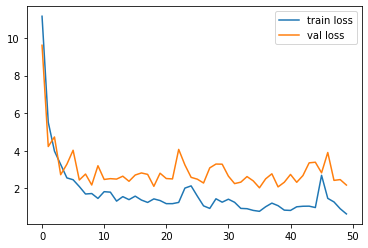

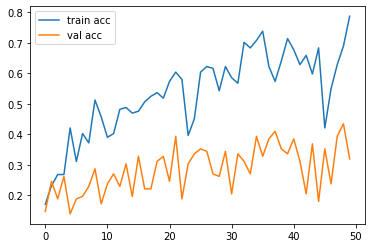

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[1.31620727e-02, 7.80685320e-02, 1.38887942e-01, 2.15982974e-01,
        5.25223434e-01, 2.86749806e-02],
       [8.91593192e-03, 8.96089301e-02, 3.16632465e-02, 5.34008816e-02,
        2.94763327e-01, 5.21647751e-01],
       [1.46941110e-01, 4.84251510e-03, 7.00223088e-01, 1.41671430e-02,
        1.06008433e-01, 2.78177354e-02],
       [3.02388966e-01, 1.11880358e-02, 5.93341850e-02, 1.44689521e-02,
        6.06427729e-01, 6.19205181e-03],
       [4.47446495e-01, 3.83326709e-02, 2.54908539e-02, 1.23319514e-01,
        3.60278189e-01, 5.13219601e-03],
       [3.30832154e-01, 3.50725092e-03, 3.07581753e-01, 9.15130526e-02,
        2.60017067e-01, 6.54866500e-03],
       [2.60644943e-01, 4.31884918e-03, 1.90985447e-03, 1.62624605e-02,
        7.14531958e-01, 2.33190064e-03],
       [2.29173213e-01, 4.10574138e-01, 1.23900436e-01, 1.90747238e-03,
        1.95656925e-01, 3.87878157e-02],
       [3.61728221e-02, 8.96927238e-01, 3.56477611e-02, 2.01843650e-04,
        2.94661857e-02, 

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([4, 5, 2, 4, 0, 0, 4, 1, 1, 4, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 4, 0,
       0, 0, 2, 4, 1, 0, 0, 1, 2, 1, 4, 1, 1, 3, 2, 4, 1, 4, 0, 4, 4, 0,
       1, 3, 1, 1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 0, 2, 3, 4, 0, 2, 0, 1,
       0, 0, 2, 4, 2, 4, 1, 0, 2, 1, 0, 4, 4, 0, 2, 0, 3, 0, 2, 0, 1, 1,
       1, 0, 1, 4, 4, 1, 0, 1, 3, 1, 1, 2, 4, 4, 4, 5, 1, 2, 1, 1, 2, 2,
       3, 4, 4, 0, 1, 1, 2, 0, 2, 1, 3, 2])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [33]:
img=image.load_img('Datasets/Test/lamborghini/2.jpg',target_size=(224,224))



In [34]:
x=image.img_to_array(img)

x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[1.8233679e-01, 2.6721117e-04, 1.7939539e-03, 1.0864979e-03,
        3.1681012e-02, 7.8283459e-01]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
a==1

array([False])